**ADVANCED MACHINE LEARNING**

Assignment 1

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In this model, I am using 3 layers with 64 nodes. Activation function "tanh" is used instead of "ReLU". 


ReLU function is not suitable for problems where negative values are important because it ranges from 0-infinity.
Tanh function is suitable for model with both positive and negative values because it ranges from -1 to +1 with zero as mid point.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5234 - accuracy: 0.7363 - val_loss: 0.2849 - val_accuracy: 0.8385
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2149 - accuracy: 0.8625 - val_loss: 0.1620 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1488 - accuracy: 0.8800 - val_loss: 0.1636 - val_accuracy: 0.8435
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1336 - accuracy: 0.8848 - val_loss: 0.1310 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1243 - accuracy: 0.8905 - val_loss: 0.1361 - val_accuracy: 0.8718
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1120 - accuracy: 0.9059 - val_loss: 0.1525 - val_accuracy: 0.8469
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1127 - accuracy: 0.9048 - val_loss: 0.1351 - val_accuracy: 0.8676
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

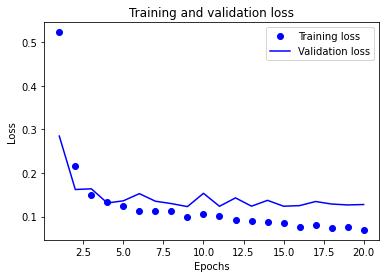

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

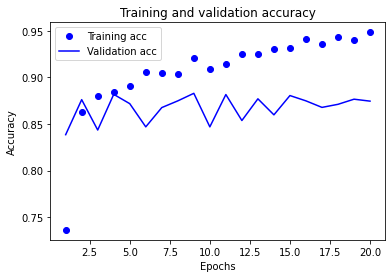

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.1331 - accuracy: 0.8675


In [ ]:
results

[0.13307130336761475, 0.8675199747085571]

I've seen from the aforementioned models, which have various levels and functions, that the model with more nodes appears to be more stable. For each of these models, the training accuracy is still higher. Several layers and the MSE loss function helped me achieve some of the best outcomes.

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.3586 - accuracy: 0.7912
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1566 - accuracy: 0.8916
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.1496 - accuracy: 0.8952
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1632 - accuracy: 0.8758


In [ ]:
results

[0.09821346402168274, 0.8769199848175049]

SUMMARY:

Analysing model with 20 Epochs with a batch size of 512.

Summary for Validation Loss function: (Activation function = tanh) (Loss = MSE)

I've tested the Binary Cross Entropy and MSE loss functions for different units (16, 32, and 64) while maintaining the three layers and the tanh activation function ("relu" for certain comparisons). Regularization for MSE using hyper parameter is what I've used as (0.005)

Nodes=16 with 3 Layers. BCE vs MSE, tanh: (Using Regularization)

In MSE, the validation loss starts with 0.17 and gradually decreased to 0.12. In BSE, the validation loss starts with 0.4,flutuate and increased to 0.58.

Nodes=32 with 3 Layers. BCE vs MSE, ReLU: (Using Regularization)

In MSE, the validation loss starts with 0.15 and gradually decreased to 0.13. In BCE, the validation loss starts with 0.5, flutuate in the middle and decreased to 0.4.

Nodes=32 with 3 Layers. BCE vs MSE, tanh: (Using Regularization)

In MSE, the validation loss starts with 0.24 and gradually decreased to 0.1. In BSE, the validation loss starts with 0.4 and decreases untill epoch 6, again increased to 0.6.

Nodes=64 with 3 Layers. BCE vs MSE, ReLU: (Using Regularization)

In MSE, the validation loss starts with 0.2, flutuate in the middle and decreased to 0.13. In BSE, the validation loss starts with 0.5, flutuate in the middle and increased to 0.7.

Nodes=64 with 3 Layers. BCE vs MSE, tanh: (Using Regularization)

In MSE, the validation loss starts with 0.2, fluctuate in the middle and decreased to 0.1. In BSE, the validation loss starts with 0.5, flutuate in the middle and maintained same 0.5.

Summary for Validation and training accuracy:

Nodes=16,Layers=3,tanh: (Using Regularization l2 & Dropout)

The validation accuracy, flutuate little bit in the middle but end up with 87%. The training accuracy increased to 94%.

Nodes=32,Layers=3,tanh: (Using Regularization l2 & Dropout)

The validation accuracy faced a lot of flutuation but increase to 87%. The training accuracy gradually increased to 94%.

Nodes=64,Layers=3,tanh: (Using Regularization l2 & Dropout)

The validation accuracy end up with flactuation but increased to 87%. The training accuracy gradually increase and reach 95%. By doing so, we may determine that the data used for training and validation differ significantly from one another. The use of stratified sampling can prevent this.

Summary for test accuracy:

Nodes=64 with 3 Layers. (Activation func: tanh), epoch=4:

The test accuracy of the model is nearly 88% with the loss rate of 16.32.

Nodes=64 with 3 Layers. (Activation func: relu), epoch=4:

The test accuracy of the model is 86% with the loss rate of 21.25.

Comparing the model with 3 hidden layers, l2 regularizer (0.005) and dropout, and 64 hidden nodes to other models with fewer layers and hidden nodes, the model with these features appears to have a lower loss rate during validation and testing, maintaining a less complex model and training and testing accuracy. 

Optimizer:

Adam:
In test set, optimizer "adam" is used. Adam is an optimization algorithm, it adapts the learning rate for each parameter based on its past gradients, and is computationally efficient and robust to the choice of hyperparameters. My model get accuracy of 88% using adam optimizer

RMSPROP:

RMSprop is an optimization algorithm, it uses a moving average of the squared gradients to adapt the learning rate for each parameter. This can help prevent oscillations and slow down learning in the presence of noisy gradients. RMSprop is often used in tasks such as image recognition, natural language processing, and speech recognition. The accuracy of test set using rmsdrop optimizer is 86%. 














